In [27]:
from sklearn import datasets
import pandas
import matplotlib.pyplot as plt


In [2]:
iris = datasets.load_iris()

In [10]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


First, we need to actually create our dataset into a readable form. Our iris object currently is a dictionary containing different components of the Iris dataset. 

By examining what values map to the 'data', 'target', 'feature_names', and 'target_names' keys, we see that they are the inputs, labels, column names, and label names, respectively.

In [22]:
iris.get('target')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris.get('feature_names')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.get('target_names')

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
X = pandas.DataFrame(iris.get('data'), columns = iris.get('feature_names'))
y = iris.get('target')

Let's examine how the each flower actually differs from each other. Let's plot the features pairwise and color them according to their actual color.

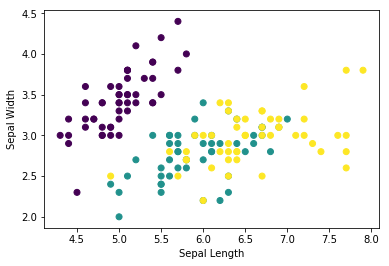

In [36]:
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c = y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

More programmatically, we can look at all pairs...

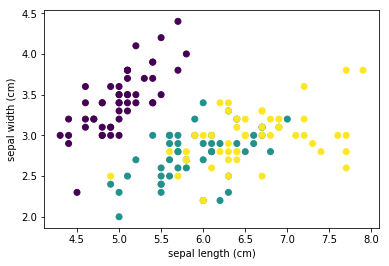

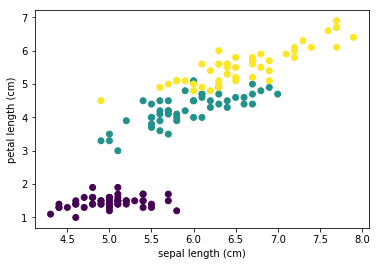

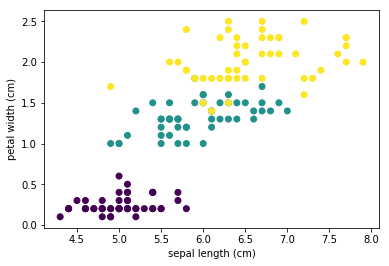

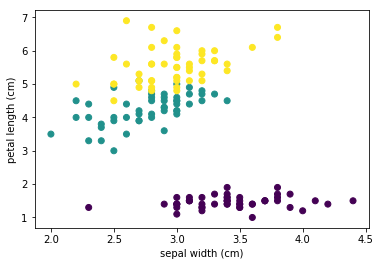

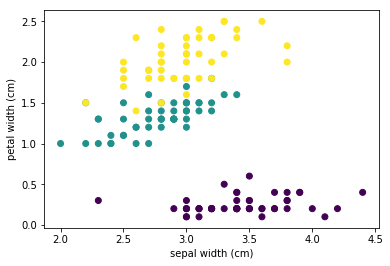

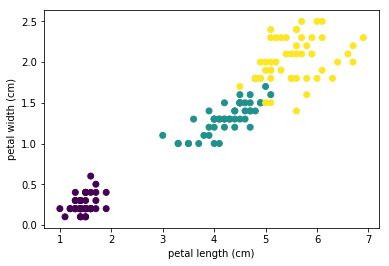

In [39]:
features = iris.get('feature_names')
for f1 in range(len(features)):
    for f2 in range(f1 + 1, len(features)):
        plt.scatter(X[features[f1]], X[features[f2]], c = y)
        plt.xlabel(features[f1])
        plt.ylabel(features[f2])
        plt.show()

It's pretty interesting that it seemes like each species of flower seems to separate according to the values given by their features pretty consistently. They seem pretty unique when examining each pair of features.

But, can we use **unsupervised learning** to discover this pattern?

Recall that K-Means clustering is a clustering algorithm where one must *define* the number of clusters that thee algorithm will separate the data into. We know that each flower belongs to one of three species, 'setosa', 'versicolor', or 'virginica'. 

Thus, intuitively, *what could be a pretty reasonable value for k?*

In [40]:
from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Once we actually run the clustering algorithm, it'll label each entry according to the algorithm's final output, which is calculated according to iterations using some predefined similarity metric (in KMeans' case, Euclidean Distance).

We can retrieve the generated labels using the "labels_" attribute after fitting the model.

In [62]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Sanity check/proof that these are the right labels...

In [63]:
assert len(kmeans.labels_) == len(y)

Do we still see the nice separation by species? Let's *directly compare* the results of our clustering.

True labels: sepal length (cm) and sepal width (cm)


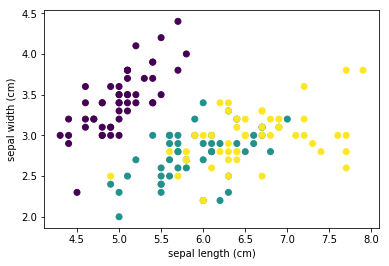

Generated labels: sepal length (cm) and sepal width (cm)


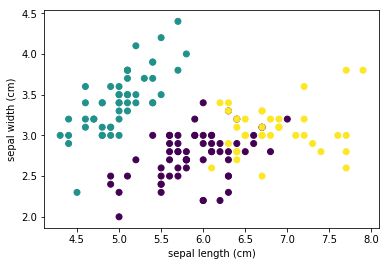

True labels: sepal length (cm) and petal length (cm)


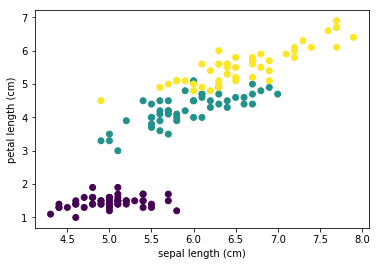

Generated labels: sepal length (cm) and petal length (cm)


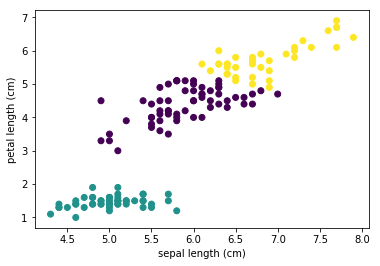

True labels: sepal length (cm) and petal width (cm)


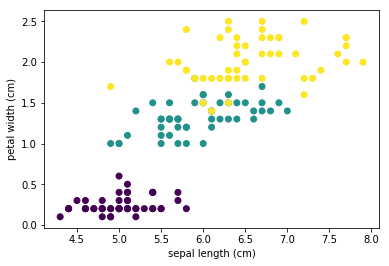

Generated labels: sepal length (cm) and petal width (cm)


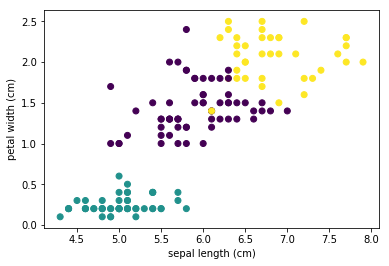

True labels: sepal width (cm) and petal length (cm)


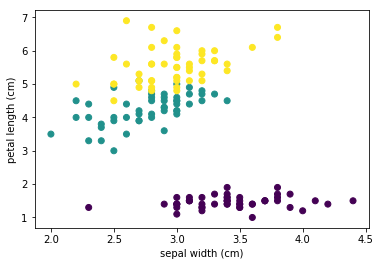

Generated labels: sepal width (cm) and petal length (cm)


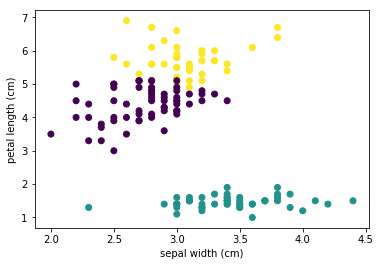

True labels: sepal width (cm) and petal width (cm)


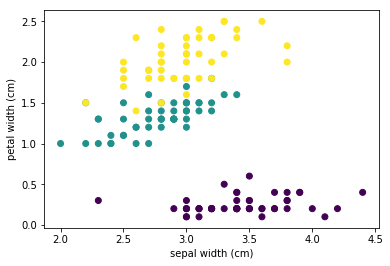

Generated labels: sepal width (cm) and petal width (cm)


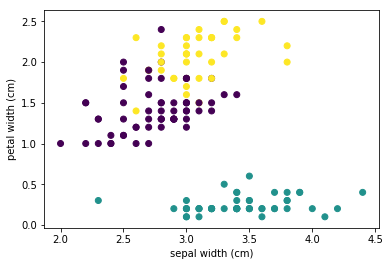

True labels: petal length (cm) and petal width (cm)


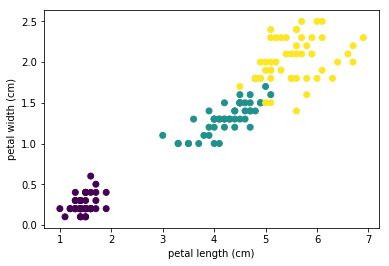

Generated labels: petal length (cm) and petal width (cm)


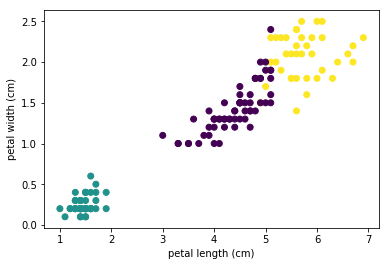

In [64]:
features = iris.get('feature_names')
for f1 in range(len(features)):
    for f2 in range(f1 + 1, len(features)):
        print('True labels: ' + features[f1] + ' and ' + features[f2])        
        plt.scatter(X[features[f1]], X[features[f2]], c = y)        
        plt.xlabel(features[f1])
        plt.ylabel(features[f2])
        plt.show()
        
        print('Generated labels: ' + features[f1] + ' and ' + features[f2])
        plt.scatter(X[features[f1]], X[features[f2]], c = kmeans.labels_)
        plt.xlabel(features[f1])
        plt.ylabel(features[f2])
        plt.show()

Overall, we see that the clustering is able to label points almost perfectly to their actual labels. This speaks to both the features as well as the clustering algorithm: these features are **very** discriminative of what species of flower each instance is, and K-means with k = 3 is a great choice to cluster these points.

In [66]:
print('True distribution of labels:\n', pandas.DataFrame(y)[0].value_counts())
print('Clustered distribution of labels:\n', pandas.DataFrame(kmeans.labels_)[0].value_counts())

True distribution of labels:
 2    50
1    50
0    50
Name: 0, dtype: int64
Clustered distribution of labels:
 0    62
1    50
2    38
Name: 0, dtype: int64


Examining the distributions, we see that they are perfectly clustered but it seems to work pretty well overall. (Note that the original 2 does not necessarily correspond to the clustered 2, etc. because the algorithm does not follow the ordering of the labels; it does not know that the original labels exist.)

It should be noted that in practice, we will rarely ever find a dataset like this one. It is rare for the values to be this clean and for the labels to distributed perfectly (50-50-50); there will usually be a lot of noise. You should clean your data as we discussed in the EDA workshop. 

Since we usually do not know the labels beforehand, clustering can often help us to actually *find* patterns or *find* labels. Here, we more or less compare clustering to actual labels to show that it *does work*. 

Assume that we didn't know that each point belonged to one of three species. *What could we do to determine a value of k?*

**Elbow Plot**

One thing we could do is examine the features like we did earlier, but without the coloring to see if there is any clear visual breakdown. However, this gets harder the higher the dimensions of our dataset are.

More mathematically, (but still visually), we could calculate an elbow plot to find the value of k that would help capture the most amount of variance.

In [67]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

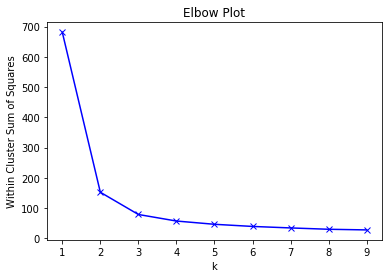

In [82]:
wss = []
K = range(1,10) #range of values of k to try
for k in K:
    km = KMeans(n_clusters=k).fit(X)
    km.fit(X) #X defined from way earlier
    wss.append(sum(np.min(np.square(cdist(X, km.cluster_centers_, 'euclidean')), axis=1)))
#     wss.append(sum(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Plot')
plt.show()

We see that after k = 3, there isn't really any further decreasing in within cluster sum of squares. Remember that the goal of clustering is to minimize distance so choosing a k value any higher than k doesn't really explain anything new for us.